In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [3]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yf.download(a, start='2010-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,39.663837,1132.989990
2010-01-05,39.676838,1136.520020
2010-01-06,39.488644,1137.140015
2010-01-07,39.274479,1141.689941
2010-01-08,39.222572,1144.979980


<Axes: xlabel='Date'>

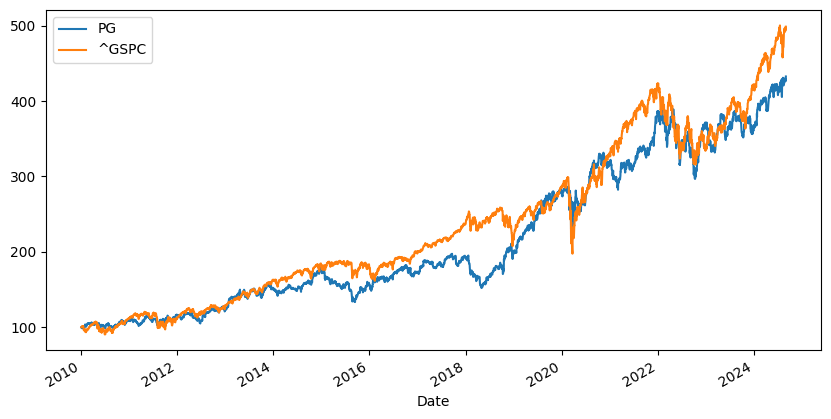

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [8]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [9]:
log_returns.mean() * 250

PG       0.099239
^GSPC    0.108872
dtype: float64

In [10]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029079,0.016148
^GSPC,0.016148,0.029946


In [11]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.547225
^GSPC,0.547225,1.000000


In [12]:
num_assets = len(assets)
num_assets

2

In [13]:
arr = np.random.random(2)
arr

array([0.31263049, 0.62528678])

In [14]:
arr[0] + arr[1]

np.float64(0.9379172681632832)

In [15]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.71954773, 0.28045227])

In [16]:
weights[0] + weights[1]

np.float64(1.0)

Expected Portfolio Return:

In [17]:
np.sum(weights * log_returns.mean()) * 250

np.float64(0.10194082470130238)

Expected Portfolio Variance

In [18]:
np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))

np.float64(0.023928149765464427)

Expected Portfolio Volatilty

In [ ]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

In [ ]:
pfolio_returns = []
pfolio_volatilities = []	

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    